# WeatherPy
----

#### Observations
 * Southern Hemisphere has lower wind speeds
 * Max Temperature peaks between 0 and 20 latitude
 * The more extreme the latitude, the more cloudy it gets. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json 
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['hovd',
 'jamestown',
 'norman wells',
 'bluff',
 'rikitea',
 'tasiilaq',
 'fukue',
 'coria',
 'mataura',
 'atuona',
 'pisco',
 'busselton',
 'kurilsk',
 'svetlogorsk',
 'tuktoyaktuk',
 'avarua',
 'haifa',
 'hermanus',
 'nueva loja',
 'punta arenas',
 'saint anthony',
 'kahului',
 'kathu',
 'fort abbas',
 'agirish',
 'toliary',
 'ribeira grande',
 'kapaa',
 'provideniya',
 'iqaluit',
 'namatanai',
 'yellowknife',
 'barentsburg',
 'hilo',
 'goderich',
 'arraial do cabo',
 'kyren',
 'ushuaia',
 'illoqqortoormiut',
 'hami',
 'marcona',
 'kuche',
 'pimentel',
 'ostrovnoy',
 'souillac',
 'nikolskoye',
 'berlevag',
 'karratha',
 'dharampuri',
 'benguela',
 'tarauaca',
 'barrow',
 'miguel hidalgo',
 'taolanaro',
 'vaini',
 'neiafu',
 'new norfolk',
 'saint george',
 'khasan',
 'mozarlandia',
 'panama city',
 'east london',
 'nezhinka',
 'hobart',
 'balimo',
 'portland',
 'thompson',
 'mehamn',
 'arrecife',
 'talnakh',
 'abonnema',
 'ossora',
 'padang',
 'kibungo',
 'venustiano carranza',
 'c

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "cod": "404",
    "message": "city not found"
}


In [4]:
print(requests.get(query_url + city))

<Response [404]>


In [5]:
# empty lists to hold info
city_name = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Khovd
Processing Record 2 | Jamestown
Processing Record 3 | Norman Wells
Processing Record 4 | Bluff
Processing Record 5 | Rikitea
Processing Record 6 | Tasiilaq
Processing Record 7 | Fukuechō
Processing Record 8 | Coria
Processing Record 9 | Mataura
Processing Record 10 | Atuona
Processing Record 11 | Pisco
Processing Record 12 | Busselton
Processing Record 13 | Kuril'sk
Processing Record 14 | Forsytheganj
Processing Record 15 | Tuktoyaktuk
Processing Record 16 | Avarua
Processing Record 17 | Haifa
Processing Record 18 | Hermanus
Processing Record 19 | Nueva Loja
Processing Record 20 | Punta Arenas
Processing Record 21 | Saint Anthony
Processing Record 22 | Kahului
Processing Record 23 | Kathu
Processing Record 24 | Fort Abbas
Processing Record 25 | Agirish
City not found. Skipping...
Processing Record 26 | Ribeira Grande
Processing Record 27 | Kapaa
Processing Record 28 | Provideniya
Processing Record 29 |

Processing Record 229 | Velyka Mykhaylivka
Processing Record 230 | Sulangan
Processing Record 231 | Balkanabat
City not found. Skipping...
Processing Record 232 | Jishou
Processing Record 233 | Torbay
Processing Record 234 | Kinel’-Cherkassy
Processing Record 235 | Belmonte
Processing Record 236 | Bairiki Village
City not found. Skipping...
Processing Record 237 | Moose Factory
Processing Record 238 | Lavrentiya
City not found. Skipping...
Processing Record 239 | Shizukuishi
Processing Record 240 | Sadovoye
Processing Record 241 | Proletarskiy
Processing Record 242 | Amahai
Processing Record 243 | Port Hardy
Processing Record 244 | Gaya
Processing Record 245 | Agara
Processing Record 246 | Mamontovo
City not found. Skipping...
Processing Record 247 | Tessalit
Processing Record 248 | Katobu
Processing Record 249 | Jhang
Processing Record 250 | Auki
Processing Record 251 | Cherskiy
Processing Record 252 | Paka
Processing Record 253 | Anito
Processing Record 254 | Adrar
Processing Record 

Processing Record 453 | Naco
Processing Record 454 | Prieska
Processing Record 455 | Yzeure
City not found. Skipping...
Processing Record 456 | Inírida
Processing Record 457 | Dryden
Processing Record 458 | Osypenko
Processing Record 459 | Machachi
Processing Record 460 | Aksarka
Processing Record 461 | Puebla
Processing Record 462 | Ulundi
Processing Record 463 | Port Blair
Processing Record 464 | Malé
Processing Record 465 | Poso
Processing Record 466 | Matara
Processing Record 467 | Saint Paul Harbor
City not found. Skipping...
Processing Record 468 | Oberá
Processing Record 469 | Vila Velha
Processing Record 470 | Derzhavīnsk
Processing Record 471 | Borovoy
Processing Record 472 | Mareeba
Processing Record 473 | Barra dos Coqueiros
City not found. Skipping...
Processing Record 474 | Kidal
Processing Record 475 | Itoman
Processing Record 476 | Merzifon
Processing Record 477 | Kamenz
Processing Record 478 | Tura
Processing Record 479 | Oistins
Processing Record 480 | Concordia
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a DataFrame from lists above
weather_dict = {
    "City": city_name,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

weather_data = pd.DataFrame(weather_dict)
# check number of dataframe
weather_data.count()

City               540
Latitude           540
Longitude          540
Max Temperature    540
Humidity           540
Cloudiness         540
Wind Speed         540
Country            540
Date               540
dtype: int64

In [7]:
# save to csv
weather_data.to_csv("./weather_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# print summary of data
weather_data.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,5.400000e+02
mean,21.654538,21.679317,60.265463,72.394444,59.212963,8.185204,1.635007e+09
std,33.500107,88.824284,21.009092,19.083499,37.480595,5.686577,9.943045e+01
min,-54.800000,-175.200000,-13.920000,9.000000,0.000000,0.000000,1.635006e+09
25%,-5.591700,-57.966525,45.202500,62.000000,20.000000,3.932500,1.635007e+09
50%,27.800000,27.788850,64.110000,76.000000,75.000000,6.910000,1.635007e+09
75%,50.204200,101.338375,76.980000,87.000000,94.250000,11.252500,1.635007e+09
max,78.218600,178.416700,100.310000,100.000000,100.000000,37.980000,1.635007e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

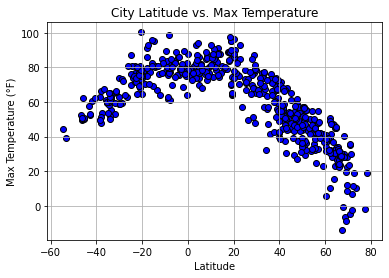

In [9]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig(".Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

## Latitude vs. Humidity Plot

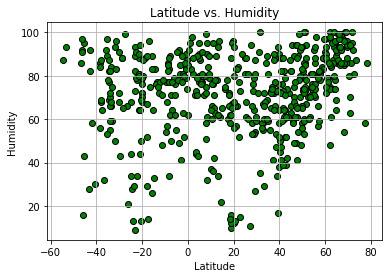

In [10]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="green", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig(".Latitude_vs_Humidity.png")

# Show Plot
plt.show()

## Latitude vs. Cloudiness Plot

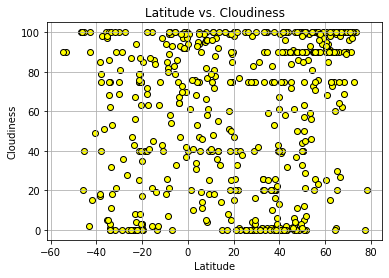

In [11]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="yellow", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig(".Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

## Latitude vs. Wind Speed Plot

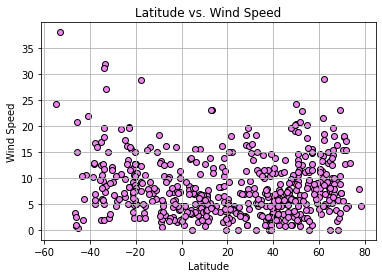

In [12]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="violet", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig(".Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()

## Linear Regression

In [13]:
# split data into Northern and Southern Hemisphere
northern_df = weather_data.loc[(weather_data["Longitude"]).astype(float) > 0, :]
southern_df = weather_data.loc[(weather_data["Longitude"]).astype(float) < 0, :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

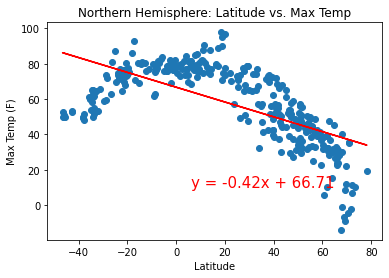

In [14]:
x_values = northern_df['Latitude']
y_values = northern_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere: Latitude vs. Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.savefig(".North_Latitude_vs_Max_Temperature.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

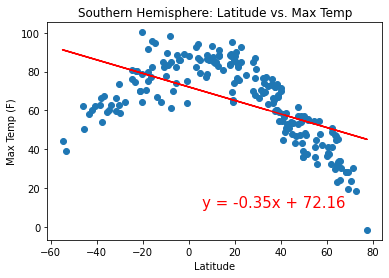

In [15]:
x_values = southern_df['Latitude']
y_values = southern_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere: Latitude vs. Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.savefig(".South_Latitude_vs_Max_Temperature.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

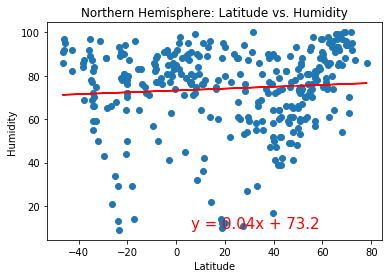

In [16]:
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere: Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig(".North_Latitude_vs_Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

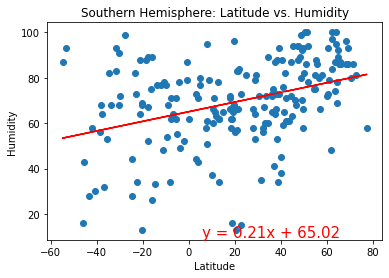

In [17]:
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere: Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig(".South_Latitude_vs_Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

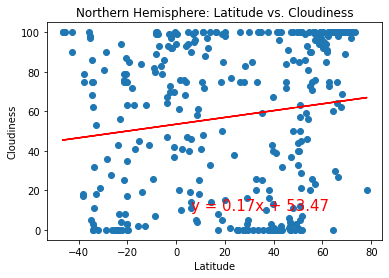

In [18]:
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere: Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig(".North_Latitude_vs_Cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

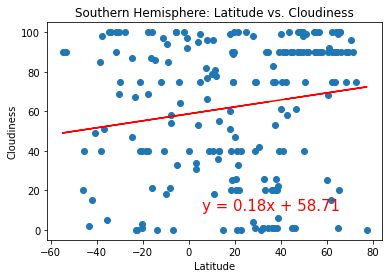

In [19]:
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere: Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig(".South_Latitude_vs_Cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

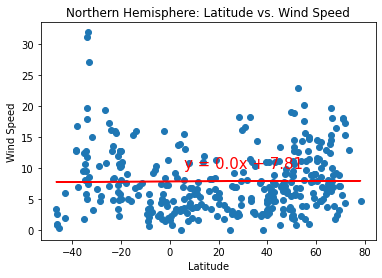

In [20]:
x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere: Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig(".North_Latitude_vs_Wind_Speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

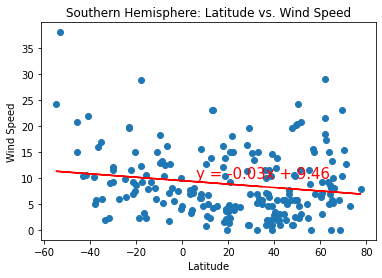

In [21]:
x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere: Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig(".South_Latitude_vs_Wind_Speed.png")
plt.show()